In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load the data

In [2]:
# load the data
titanic_df = pd.read_csv("csv/train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Explore the date

In [7]:
# correlation for survived
titanic_df.corr()["Survived"]

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [44]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

### How many survived Titanic?

In [72]:
titanic_df["Survived"].value_counts()/titanic_df["Survived"].count()

0    0.616162
1    0.383838
Name: Survived, dtype: float64

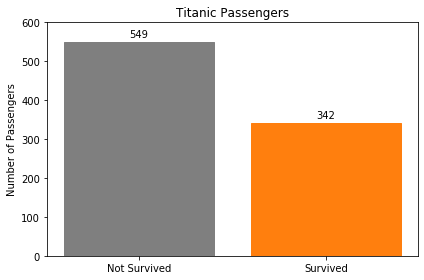

In [58]:
survivor = titanic_df["Survived"].value_counts().reset_index(name="Passengers")
survivor.rename(columns={"index":"IsSurvivor"}, inplace=True)
survivor["IsSurvivor"].replace([0, 1], ["Not Survived", "Survived"], inplace=True)

fig, ax = plt.subplots()
rect = ax.bar(survivor["IsSurvivor"], survivor["Passengers"])

# Set the Colors
rect[0].set_color("tab:gray")
rect[1].set_color("tab:orange")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title("Titanic Passengers")
ax.set_ylabel("Number of Passengers")
ax.set_ylim([0, 600])

autolabel(rect)

fig.tight_layout()

plt.savefig("fig/num_of_survivors.png")

### Titanic Passengers by Gender

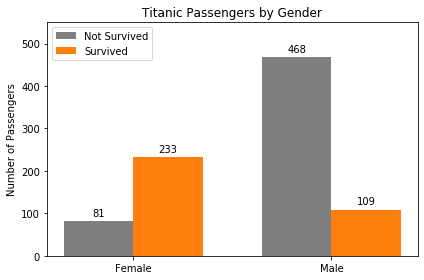

In [66]:
survivor_gender = titanic_df.groupby(["Sex", "Survived"])["PassengerId"].nunique().reset_index(name='UniquePassenger')
survivor_gender.rename(columns={"Survived":"IsSurvivor"}, inplace=True)
survivor_gender["IsSurvivor"].replace([0, 1], ["Not Survived", "Survived"], inplace=True)

# Capitalize sex
survivor_gender["Sex"] = survivor_gender["Sex"].str.capitalize()

labels = survivor_gender["Sex"].unique()
survived_passenger = survivor_gender[survivor_gender["IsSurvivor"]=="Survived"]["UniquePassenger"]
other_passenger = survivor_gender[survivor_gender["IsSurvivor"]=="Not Survived"]["UniquePassenger"]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, other_passenger, width, label="Not Survived", color="tab:gray")
rects2 = ax.bar(x + width/2, survived_passenger, width, label="Survived", color="tab:orange")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title("Titanic Passengers by Gender")
ax.set_ylabel("Number of Passengers")
ax.set_ylim([0, 550])
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig("fig/survivor_by_gender.png")

### Titanic Passengers by Class

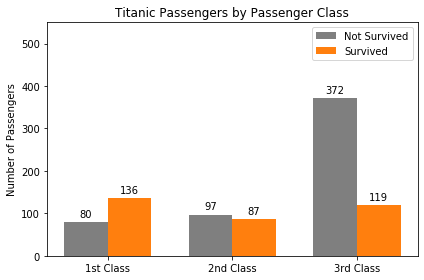

In [70]:
survivor_class = titanic_df.groupby(["Pclass", "Survived"])["PassengerId"].nunique().reset_index(name='UniquePassenger')
survivor_class.rename(columns={"Survived":"IsSurvivor"}, inplace=True)
survivor_class["IsSurvivor"].replace([0, 1], ["Not Survived", "Survived"], inplace=True)

# Rename the passenger class
survivor_class["Pclass"].replace([1, 2, 3], ["1st Class", "2nd Class", "3rd Class"], inplace=True)

labels = survivor_class["Pclass"].unique()
survived_passenger = survivor_class[survivor_class["IsSurvivor"]=="Survived"]["UniquePassenger"]
other_passenger = survivor_class[survivor_class["IsSurvivor"]=="Not Survived"]["UniquePassenger"]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, other_passenger, width, label="Not Survived", color="tab:gray")
rects2 = ax.bar(x + width/2, survived_passenger, width, label="Survived", color="tab:orange")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title("Titanic Passengers by Passenger Class")
ax.set_ylabel("Number of Passengers")
ax.set_ylim([0, 550])
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig("fig/survivor_by_class.png")